# Pymaceuticals Inc.
---

### Analysis

- There is a strong correlation between mouse weight and the average tumor weight for mice on the Capomulin regimen.
- For mouse l509, who was on the Capomulin regimen, the tumor was smallest at 35 days.
- The mice on the Capomulin and Ramicane regimens had the lowest (albeit similar) average & median tumor weight over time.
- Of the 4 regimens analyzed for outliers, the Infutinol regimen had the only outlier outside the lower bounds.

In [181]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

#C:\Users\dukec\Desktop\MatPlotLib-Challenge\Starter_Code\Starter_Code\Pymaceuticals\data
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [18]:
# Checking the number of mice.

mouse_count = len(merge_df["Mouse ID"].unique())
mouse_count

249

In [23]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merge_df[merge_df.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
unique_mice = duplicate_mice["Mouse ID"].unique()
unique_mice

array(['g989'], dtype=object)

In [77]:
# Optional: Get all the data for the duplicate mouse ID. 
#duplicate_mice = pd.DataFrame(merge_df[merge_df.duplicated(['Mouse ID', 'Timepoint'], keep=False)])
duplicate_mice = merge_df.loc[merge_df["Mouse ID"] == "g989", :]
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [36]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = merge_df.loc[merge_df['Mouse ID'] != "g989"]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [37]:
# Checking the number of mice in the clean DataFrame.
mouse_count = len(clean_df["Mouse ID"].unique())
mouse_count

248

## Summary Statistics

In [45]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
variance = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
stdv = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
sem = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
drug_summary_df = pd.DataFrame({"Mean Tumor Volume": mean,
                               "Median Tumor Volume": median,
                               "Tumor Volume Variance": variance,
                               "Tumor Volume Std. Dev": stdv,
                               "Tumor Volume Std. Err.": sem})
drug_summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [47]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
drug_agg_summary_df = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
drug_agg_summary_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

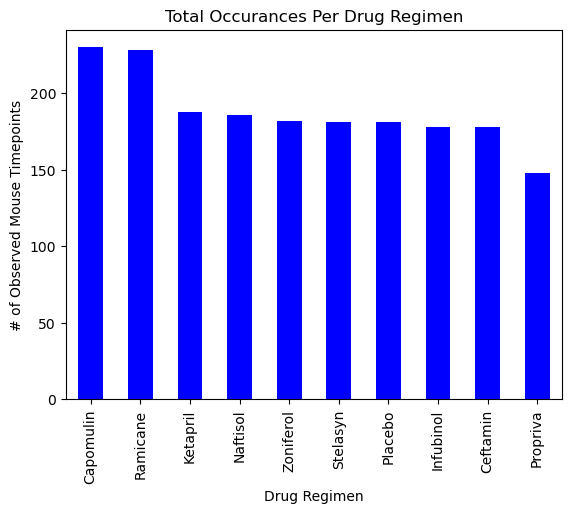

In [53]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_counts = clean_df['Drug Regimen'].value_counts()
drug_counts

# Create a bar plot
drug_counts.plot(kind='bar', color='blue')
plt.title('Total Occurances Per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)  
plt.show()

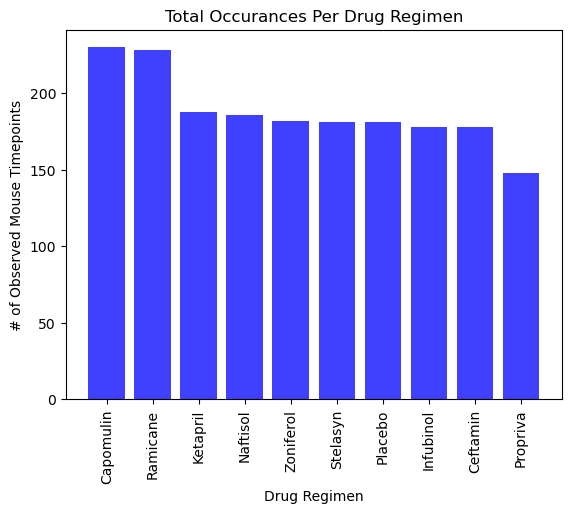

<Figure size 640x480 with 0 Axes>

In [57]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_counts = clean_df['Drug Regimen'].value_counts()

drug_names = drug_counts.index
drug_names_counts = drug_counts.values

plt.title('Total Occurances Per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

plt.bar(drug_names, drug_names_counts, facecolor='blue', alpha=.75, align='center')
plt.xticks(drug_names, rotation='vertical')
plt.show()
plt.tight_layout()

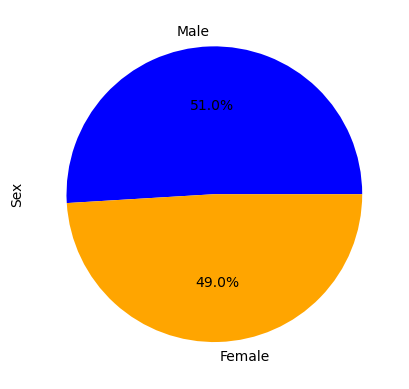

In [65]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_counts = clean_df['Sex'].value_counts()
gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'orange'], labels=gender_counts.index)
plt.ylabel("Sex")
plt.show()

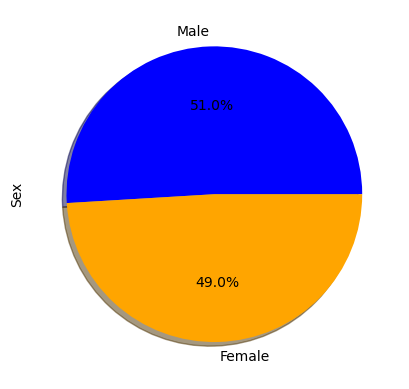

In [68]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_counts = clean_df['Sex'].value_counts()

genders = gender_counts.index
colors = ['blue', 'orange']

plt.pie(gender_counts, labels=genders, colors=colors, autopct='%1.1f%%', shadow=True)
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [126]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = clean_df.groupby('Mouse ID')['Timepoint'].max()
last_timepoints

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_df = pd.merge(clean_df, last_timepoints, on=['Mouse ID', 'Timepoint'], how='inner')
final_tumor_volume_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,f932,0,45.000000,0,Ketapril,Male,15,29
1,x336,0,45.000000,0,Naftisol,Female,4,29
2,h428,0,45.000000,0,Ketapril,Female,1,27
3,v199,0,45.000000,0,Naftisol,Female,17,29
4,o848,0,45.000000,0,Stelasyn,Female,14,27
...,...,...,...,...,...,...,...,...
243,r944,45,41.581521,2,Capomulin,Male,12,25
244,u364,45,31.023923,3,Capomulin,Male,18,17
245,p438,45,61.433892,1,Ceftamin,Female,11,26
246,x773,45,58.634971,4,Placebo,Female,21,30


In [127]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
        
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_value_df = final_tumor_volume_df.loc[final_tumor_volume_df["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
#    print(final_tumor_value_df)

    # add subset 
    tumor_data.append(final_tumor_value_df)

    # Determine outliers using upper and lower bounds (.loc to filter for each regimen)
    quartiles = final_tumor_value_df.quantile([.25, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq - (1.5 * iqr)

    potential_outliers = final_tumor_value_df.loc[(final_tumor_value_df < lower_bound) | (final_tumor_value_df > upper_bound)]
    
    print(f"{treatment} Upper bound = {upper_bound} & Lower bound = {lower_bound}")
    print(f"{treatment}'s potential outliers: {final_tumor_value_df}")

Capomulin Upper bound = 28.486425109999995 & Lower bound = 20.70456164999999
Capomulin's potential outliers: 39     39.952347
46     46.539206
56     30.485985
98     38.753265
119    38.982878
124    34.455298
126    41.483008
132    37.074024
143    32.377357
146    40.159220
152    31.896238
155    33.329098
172    38.846876
176    40.658124
184    38.939633
193    36.041047
198    28.430964
201    28.484033
204    23.343598
205    37.311846
209    40.728578
214    38.125164
233    47.685963
243    41.581521
244    31.023923
Name: Tumor Volume (mm3), dtype: float64
Ramicane Upper bound = 27.01120119 & Lower bound = 17.912664470000003
Ramicane's potential outliers: 21     43.166373
44     44.183451
79     43.419381
85     38.342008
99     36.561652
118    31.095335
128    38.407618
131    45.220869
135    36.374510
150    30.276232
154    30.638696
156    40.659006
163    30.564625
169    22.050126
177    33.397653
183    36.134852
188    31.560470
191    43.047543
199    37.311236
2

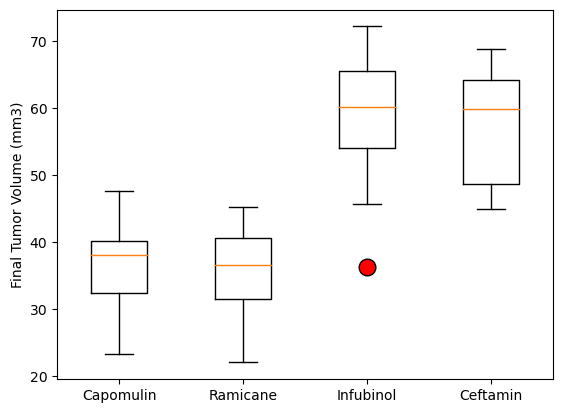

In [150]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

labels= treatments
flierprops = dict(marker='o', markerfacecolor='red', markersize=12)

fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_data, flierprops=flierprops, labels=labels)
plt.show()

## Line and Scatter Plots

In [157]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin, part 1
#find a mouse that was treated with capomulin:

capomulin_mouse = clean_df.loc[clean_df["Mouse ID"] == "l509", :]
capomulin_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
231,l509,0,45.000000,0,Capomulin,Male,17,21
253,l509,5,45.851193,0,Capomulin,Male,17,21
539,l509,10,46.759074,0,Capomulin,Male,17,21
881,l509,15,47.488599,1,Capomulin,Male,17,21
982,l509,20,48.070452,2,Capomulin,Male,17,21
1146,l509,25,44.006257,2,Capomulin,Male,17,21
1414,l509,30,44.708055,2,Capomulin,Male,17,21
1499,l509,35,40.207288,2,Capomulin,Male,17,21
1723,l509,40,40.770813,2,Capomulin,Male,17,21
1771,l509,45,41.483008,3,Capomulin,Male,17,21


<function matplotlib.pyplot.show(close=None, block=None)>

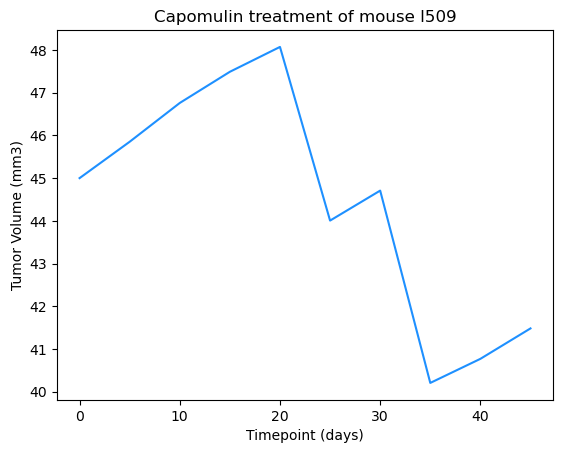

In [162]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin, part 2

mouse_volume= capomulin_mouse['Tumor Volume (mm3)']
mouse_time= capomulin_mouse['Timepoint']

plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(mouse_time, mouse_volume, color='dodgerblue')
plt.show

In [170]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen, part 1
capomulin_mice = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin", :]
capomulin_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
226,j246,0,45.000000,0,Capomulin,Female,21,21
227,r554,0,45.000000,0,Capomulin,Female,8,17
228,s185,0,45.000000,0,Capomulin,Female,3,17
229,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1854,s710,45,40.728578,1,Capomulin,Female,1,23
1859,j119,45,38.125164,1,Capomulin,Female,7,23
1878,i557,45,47.685963,1,Capomulin,Female,1,24
1888,r944,45,41.581521,2,Capomulin,Male,12,25


In [176]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen, part 2
#get variable data

capomulin_mice_weight = capomulin_mice.groupby("Mouse ID")["Weight (g)"].first()

capomulin_average_tumor = capomulin_mice.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()


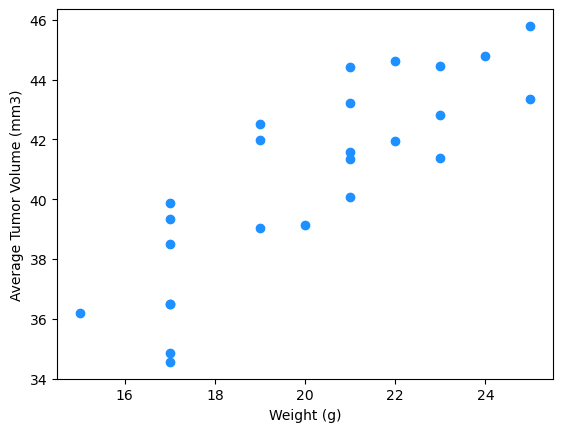

In [178]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen, part 3

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.scatter(capomulin_mice_weight, capomulin_average_tumor, marker="o", color="dodgerblue")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


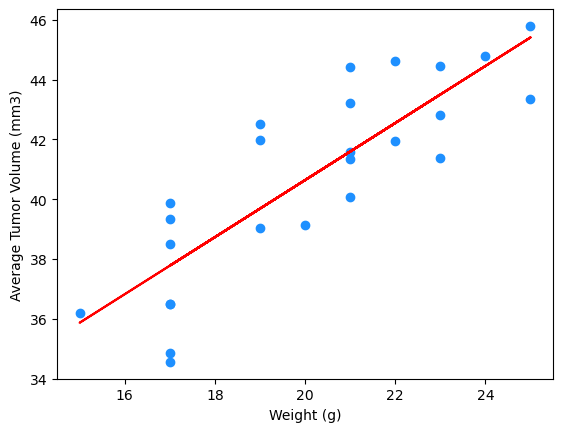

In [186]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation = st.pearsonr(capomulin_mice_weight, capomulin_average_tumor)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(capomulin_mice_weight, capomulin_average_tumor)
regress_values = capomulin_mice_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(capomulin_mice_weight, capomulin_average_tumor, marker="o", color="dodgerblue")

plt.plot(capomulin_mice_weight, regress_values,"r-")

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
